In [1]:
import numpy as np
import scipy

import matplotlib.pyplot as plt

In [2]:
def gradient(beta, y):
    pi = expit(beta) 
    return pi - np.mean(y)

def hessian(beta, y):
    pi = expit(beta)
    return pi * (1 - pi)

In [3]:
from scipy import stats
from scipy.special import logit, expit # expit is the logistic function

np.random.seed(10) # setting the random seed ensures that we get the same sample if we run the code again
prob = 0.7 # true value of the probability parameter pi
y = stats.bernoulli.rvs(prob, size=1000) 

In [4]:
def gradientdescent(x0, y, grad, alpha=1, tol=1e-6, max_iter=500):
    
    x = x0
    history = [x]
    
    iterate = True
    count = 0
    while iterate and (count < max_iter):        
        
        x0 = x
        x = x0 - alpha*grad(x0, y)
        history.append(x)
        
        # Convergence criterion
        iterate = np.abs(x-x0) > tol
        
        count += 1
    
    return x, history

In [6]:
def stochastic_gradient_descent(x0, y, grad, alpha=1, tol=1e-6, batch_size=128, max_iter=500):
    
    x = x0
    history = [x]
    
    iterate = True
    count = 0
    while iterate and (count < max_iter):
        y_sample = np.random.choice(y, size=batch_size, replace=False)
        
        x0 = x
        x = x0 - alpha * grad(x0, y_sample)
        history.append(x)
        
        # Convergence criterion
        iterate = np.abs(x - x0) > tol
        
        count += 1
    
    return x, history

In [7]:
beta, history = gradientdescent(0, y, gradient, alpha=1)

print(f'Gradient descent converged in {len(history)-1} iterations \n')
print(f'The solution for beta  {beta:.3f} \n')
print(f'The solution for pi is {expit(beta):.3f}')

Gradient descent converged in 51 iterations 

The solution for beta  0.824 

The solution for pi is 0.695


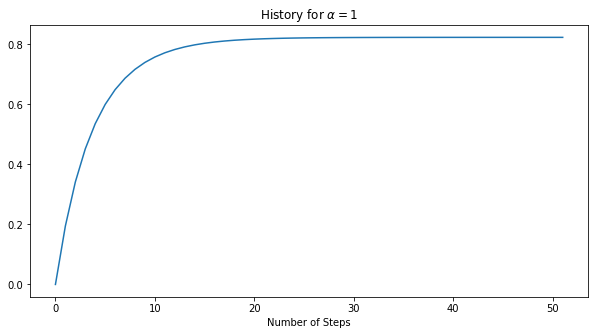

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(history)
plt.title(r'History for $\alpha=1$')
plt.xlabel("Number of Steps");

In [9]:
len(y)

1000

In [30]:
alpha = 0.05
batch_size = 128

beta, history = stochastic_gradient_descent(0, y, gradient, alpha=alpha, batch_size=batch_size, max_iter=5000)

# print(f'Gradient descent converged in {len(history)-1} iterations \n')
print(f'The solution for beta  {beta:.3f} \n')
print(f'The solution for pi is {expit(beta):.3f}')

The solution for beta  0.825 

The solution for pi is 0.695


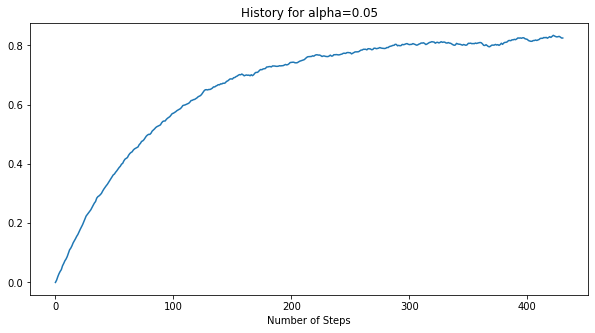

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(history)
plt.title(f'History for alpha={alpha}')
plt.xlabel("Number of Steps");